In [6]:
import matplotlib.pyplot as plt
import numpy as np
from snr import snr

In [175]:
# Load the seismic data
noisy = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/synthetic_data/syn_das_pure_noisy_data_1.npy')
noisy = noisy
syn_data = np.load('./synthetic_data/syn_das_vsp_1.npy')
ground_truth = syn_data * 1e15

data_proposed = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/syn_denoised_syn_das_pure_noisy_data_1_p24_s2_drop_0.05.npy')
data_omar = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/Omar_DIP_syn_denoised_syn_das_pure_noisy_data_1_p24_s2_drop_0.0.npy')
data_bpsomffk = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/Bpsomffk_denoised_syn_das_pure_noisy_data_1.npy')

from scipy.io import savemat
data = {
    'noisy': noisy,
    'true': ground_truth,
    'proposed': data_proposed,
    'data_omar': data_omar,
    'data_bpsomffk': data_bpsomffk
}

savemat('./synthetic_data/syn_matrix.mat', data)

Number of traces: 222, Number of samples: 1001
Time array shape: (1001,)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


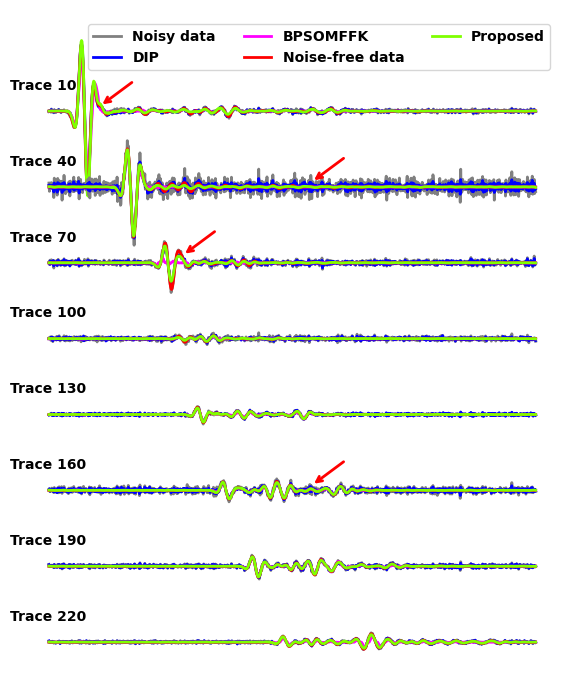

In [198]:
import numpy as np
import matplotlib.pyplot as plt
fig_path = '/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_fig/generalized_test/'

# Load the seismic data
noisy = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/synthetic_data/syn_das_pure_noisy_data_1.npy')
noisy = noisy
syn_data = np.load('./synthetic_data/syn_das_vsp_1.npy')
ground_truth = syn_data * 1e15

data_proposed = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/syn_denoised_syn_das_pure_noisy_data_1_p24_s2_drop_0.05.npy')
data_omar = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/Omar_DIP_syn_denoised_syn_das_pure_noisy_data_1_p24_s2_drop_0.0.npy')
data_bpsomffk = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/Bpsomffk_denoised_syn_das_pure_noisy_data_1.npy')

# Get the number of traces and samples
num_traces = noisy.shape[1]
num_samples = noisy.shape[0]
print(f"Number of traces: {num_traces}, Number of samples: {num_samples}")

# Create a time axis (corrected version with sampling interval)
sampling_interval = 0.001  # 1 millisecond interval
time = np.arange(0, num_samples) * sampling_interval  # Time axis based on sample count and interval
print(f"Time array shape: {time.shape}")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 7))  # Use plt.subplots to get both fig and ax

# Set flags to control legend addition
noisy_flag = True
ground_truth_flag = True
proposed_flag = True
omar_flag = True
bpsomffk_flag = True

for i in range(10, num_traces, 30):  # Plot every 30th trace
    #offset = i * 9  # Adjust offset for clear visualization
    offset_increment = 10
    offset = (num_traces - i) * offset_increment
    
    # Plot original trace (Noisy) - Change color to blue
    ax.plot(time, noisy[:, i] + offset, color='gray', linestyle='-', linewidth=2, label='Noisy data' if noisy_flag else "")
    noisy_flag = False  # Turn off further labels for noisy data


    # Plot denoised trace from Method Omar - Change color to purple
    ax.plot(time, data_omar[:, i] + offset, color='blue', linestyle='-', linewidth=2, label='DIP' if omar_flag else "")
    omar_flag = False  # Turn off further labels for Omar method
    
    # Plot denoised trace from Method BPSOMFFK - Change color to brown
    ax.plot(time, data_bpsomffk[:, i] + offset, color='fuchsia', linestyle='-', linewidth=2, label='BPSOMFFK' if bpsomffk_flag else "")
    bpsomffk_flag = False  # Turn off further labels for BPSOMFFK method   

    # Plot denoised trace from ground truth - Change color to orange
    ax.plot(time, ground_truth[:, i] + offset, color='red', linestyle='-', linewidth=2, label='Noise-free data' if ground_truth_flag else "")
    ground_truth_flag = False  # Turn off further labels for ground truth
    
    
    # Plot denoised trace from proposed method - Change color to green
    ax.plot(time, data_proposed[:, i] + offset, color='chartreuse', linestyle='-', linewidth=2, label='Proposed' if proposed_flag else "")
    proposed_flag = False  # Turn off further labels for proposed method

    # Add trace number at the beginning of the trace, slightly above
    ax.text(time[0] - 0.08, offset + 100, f'Trace {i}', fontweight='bold', verticalalignment='center', fontsize=10, color='black')

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Remove the figure box by hiding the axes spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(loc='lower center', bbox_to_anchor=(0.55, 0.9), ncol=3, prop={'size': 10, 'weight': 'bold'})

arrow_props = dict(facecolor='r', edgecolor='r', arrowstyle='->', linewidth=2)
# Add arrows at specified locations (you can adjust these coordinates)
ax.annotate('', xy=(0.54, 640), xytext=(0.61, 740),
            arrowprops=arrow_props, fontsize=10)
ax.annotate('', xy=(0.275, 1550), xytext=(0.345, 1650),
            arrowprops=arrow_props, fontsize=10)
ax.annotate('', xy=(0.105, 2140), xytext=(0.175, 2240),
            arrowprops=arrow_props, fontsize=10)
ax.annotate('', xy=(0.54, 1840), xytext=(0.61, 1940),
            arrowprops=arrow_props, fontsize=10)
# Adjust layout
plt.tight_layout()


plt.savefig(f'{fig_path}multi_traces_comparison.png', dpi=300)
plt.savefig(f'{fig_path}multi_traces_comparison.pdf', dpi=300)
plt.savefig(f'{fig_path}multi_traces_comparison.eps', dpi=300)

# Show the plot
plt.show()


Number of traces: 222, Number of samples: 1001
Time array shape: (1001,)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


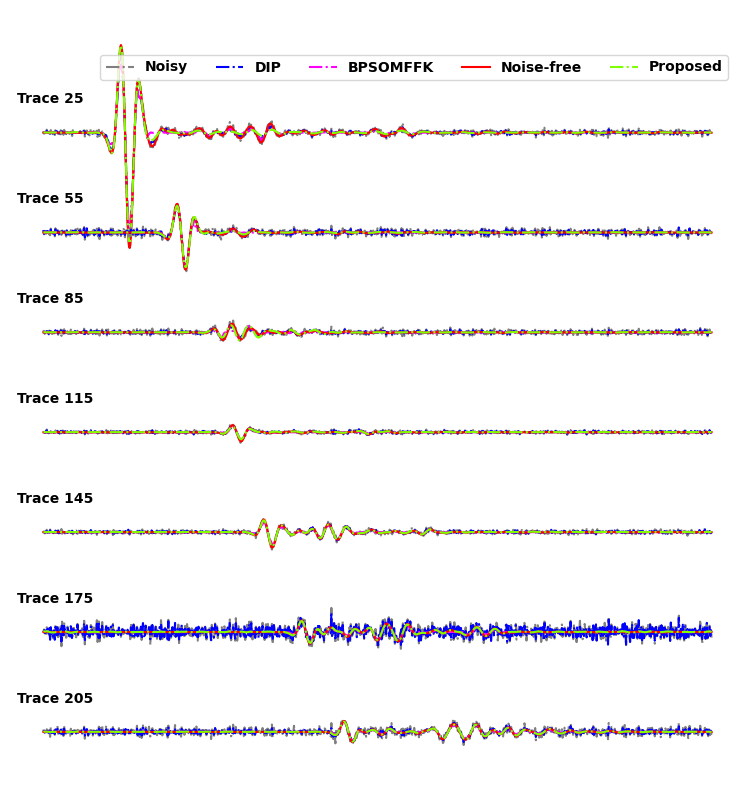

In [174]:
import numpy as np
import matplotlib.pyplot as plt
fig_path = '/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_fig/generalized_test/'

# Load the seismic data
noisy = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/synthetic_data/syn_das_pure_noisy_data_1.npy')
noisy = noisy
syn_data = np.load('./synthetic_data/syn_das_vsp_1.npy')
ground_truth = syn_data * 1e15

data_proposed = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/syn_denoised_syn_das_pure_noisy_data_1_p24_s2_drop_0.05.npy')
data_omar = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/Omar_DIP_syn_denoised_syn_das_pure_noisy_data_1_p24_s2_drop_0.0.npy')
data_bpsomffk = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/Bpsomffk_denoised_syn_das_pure_noisy_data_1.npy')

# Get the number of traces and samples
num_traces = noisy.shape[1]
num_samples = noisy.shape[0]
print(f"Number of traces: {num_traces}, Number of samples: {num_samples}")

# Create a time axis (corrected version with sampling interval)
sampling_interval = 0.001  # 1 millisecond interval
time = np.arange(0, num_samples) * sampling_interval  # Time axis based on sample count and interval
print(f"Time array shape: {time.shape}")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8))  # Use plt.subplots to get both fig and ax

# Set flags to control legend addition
noisy_flag = True
ground_truth_flag = True
proposed_flag = True
omar_flag = True
bpsomffk_flag = True

for i in range(25, num_traces, 30):  # Plot every 30th trace
    #offset = i * 9  # Adjust offset for clear visualization
    offset_increment = 10
    offset = (num_traces - i) * offset_increment
    
    # Plot original trace (Noisy) - Change color to blue
    ax.plot(time, noisy[:, i] + offset, color='gray', linestyle='-.', linewidth=1.5, label='Noisy' if noisy_flag else "")
    noisy_flag = False  # Turn off further labels for noisy data


    # Plot denoised trace from Method Omar - Change color to purple
    ax.plot(time, data_omar[:, i] + offset, color='blue', linestyle='-.', linewidth=1.5, label='DIP' if omar_flag else "")
    omar_flag = False  # Turn off further labels for Omar method
    
    # Plot denoised trace from Method BPSOMFFK - Change color to brown
    ax.plot(time, data_bpsomffk[:, i] + offset, color='fuchsia', linestyle='-.', linewidth=1.5, label='BPSOMFFK' if bpsomffk_flag else "")
    bpsomffk_flag = False  # Turn off further labels for BPSOMFFK method   

    # Plot denoised trace from ground truth - Change color to orange
    ax.plot(time, ground_truth[:, i] + offset, color='red', linestyle='-', linewidth=1.5, label='Noise-free' if ground_truth_flag else "")
    ground_truth_flag = False  # Turn off further labels for ground truth
    
    
    # Plot denoised trace from proposed method - Change color to green
    ax.plot(time, data_proposed[:, i] + offset, color='chartreuse', linestyle='-.', linewidth=1.5, label='Proposed' if proposed_flag else "")
    proposed_flag = False  # Turn off further labels for proposed method

    # Add trace number at the beginning of the trace, slightly above
    ax.text(time[0] - 0.04, offset + 100, f'Trace {i}', fontweight='bold', verticalalignment='center', fontsize=10, color='black')

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Remove the figure box by hiding the axes spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(loc='lower center', bbox_to_anchor=(0.55, 0.9), ncol=5, prop={'size': 10, 'weight': 'bold'})


plt.tight_layout()


plt.savefig(f'{fig_path}multi_traces_comparison_2.png', dpi=300)
plt.savefig(f'{fig_path}multi_traces_comparison_2.pdf', dpi=300)
plt.savefig(f'{fig_path}multi_traces_comparison_2.eps', dpi=300)

# Show the plot
plt.show()


Number of traces: 222, Number of samples: 1001
Time array shape: (1001,)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


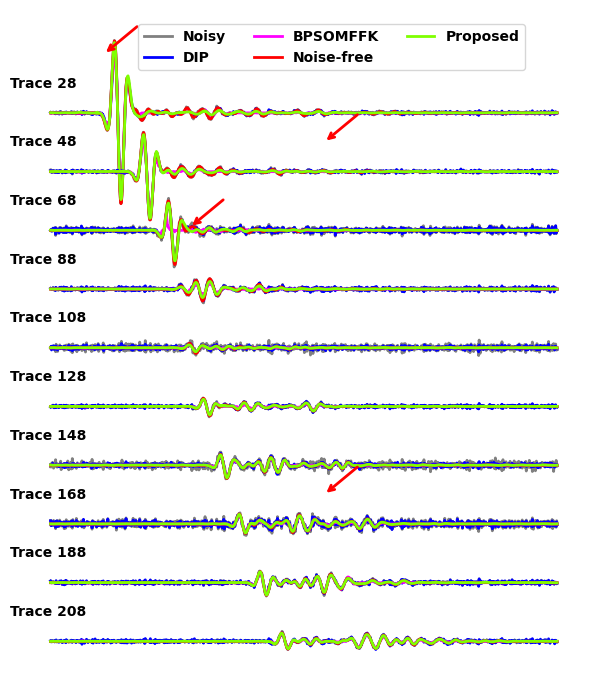

In [197]:
import numpy as np
import matplotlib.pyplot as plt
fig_path = '/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_fig/generalized_test/'

# Load the seismic data
noisy = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/synthetic_data/syn_das_pure_noisy_data_1.npy')
noisy = noisy
syn_data = np.load('./synthetic_data/syn_das_vsp_1.npy')
ground_truth = syn_data * 1e15

data_proposed = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/syn_denoised_syn_das_pure_noisy_data_1_p24_s2_drop_0.05.npy')
data_omar = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/Omar_DIP_syn_denoised_syn_das_pure_noisy_data_1_p24_s2_drop_0.0.npy')
data_bpsomffk = np.load('/home/g202321530/Yang/Project/DAS_coupling/python_code/denoised_data/syn/Bpsomffk_denoised_syn_das_pure_noisy_data_1.npy')

# Get the number of traces and samples
num_traces = noisy.shape[1]
num_samples = noisy.shape[0]
print(f"Number of traces: {num_traces}, Number of samples: {num_samples}")

# Create a time axis (corrected version with sampling interval)
sampling_interval = 0.001  # 1 millisecond interval
time = np.arange(0, num_samples) * sampling_interval  # Time axis based on sample count and interval
print(f"Time array shape: {time.shape}")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 7))  # Use plt.subplots to get both fig and ax

# Set flags to control legend addition
noisy_flag = True
ground_truth_flag = True
proposed_flag = True
omar_flag = True
bpsomffk_flag = True

for i in range(28, num_traces, 20):  # Plot every 30th trace
    #offset = i * 9  # Adjust offset for clear visualization
    offset_increment = 10
    offset = (num_traces - i) * offset_increment
    
    # Plot original trace (Noisy) - Change color to blue
    ax.plot(time, noisy[:, i] + offset, color='gray', linestyle='-', linewidth=2, label='Noisy' if noisy_flag else "")
    noisy_flag = False  # Turn off further labels for noisy data


    # Plot denoised trace from Method Omar - Change color to purple
    ax.plot(time, data_omar[:, i] + offset, color='blue', linestyle='-', linewidth=2, label='DIP' if omar_flag else "")
    omar_flag = False  # Turn off further labels for Omar method
    
    # Plot denoised trace from Method BPSOMFFK - Change color to brown
    ax.plot(time, data_bpsomffk[:, i] + offset, color='fuchsia', linestyle='-', linewidth=2, label='BPSOMFFK' if bpsomffk_flag else "")
    bpsomffk_flag = False  # Turn off further labels for BPSOMFFK method   

    # Plot denoised trace from ground truth - Change color to orange
    ax.plot(time, ground_truth[:, i] + offset, color='red', linestyle='-', linewidth=2, label='Noise-free' if ground_truth_flag else "")
    ground_truth_flag = False  # Turn off further labels for ground truth
    
    
    # Plot denoised trace from proposed method - Change color to green
    ax.plot(time, data_proposed[:, i] + offset, color='chartreuse', linestyle='-', linewidth=2, label='Proposed' if proposed_flag else "")
    proposed_flag = False  # Turn off further labels for proposed method

    # Add trace number at the beginning of the trace, slightly above
    ax.text(time[0] - 0.08, offset + 100, f'Trace {i}', fontweight='bold', verticalalignment='center', fontsize=10, color='black')

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Remove the figure box by hiding the axes spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(loc='lower center', bbox_to_anchor=(0.55, 0.9), ncol=3, prop={'size': 10, 'weight': 'bold'})

arrow_props = dict(facecolor='r', edgecolor='r', arrowstyle='->', linewidth=2)
# Add arrows at specified locations (you can adjust these coordinates)
ax.annotate('', xy=(0.54, 640), xytext=(0.61, 740),
            arrowprops=arrow_props, fontsize=10)
ax.annotate('', xy=(0.275, 1550), xytext=(0.345, 1650),
            arrowprops=arrow_props, fontsize=10)
ax.annotate('', xy=(0.105, 2140), xytext=(0.175, 2240),
            arrowprops=arrow_props, fontsize=10)
ax.annotate('', xy=(0.54, 1840), xytext=(0.61, 1940),
            arrowprops=arrow_props, fontsize=10)
# Adjust layout
plt.tight_layout()


plt.savefig(f'{fig_path}multi_traces_comparison_3.png', dpi=300)
plt.savefig(f'{fig_path}multi_traces_comparison_3.pdf', dpi=300)
plt.savefig(f'{fig_path}multi_traces_comparison_3.eps', dpi=300)
#
# Show the plot
plt.show()
